In [9]:
import sys
sys.path.append(r'C:\Users\festa\OneDrive\Desktop\Thesis\Thesis')
from functions import load_and_process_data, apply_bias_mitigation, evaluate_fairness_metrics, standardize_features, train_classifier_and_find_best_threshold, apply_best_threshold_and_compute_metrics, plot_metrics_dir, plot_metrics_aod, train_classifier_on_transformed_data, extract_fairness_metrics
from functions import train_classifier_with_dir, apply_DIR
import numpy as np

In [10]:
train, val, test, privileged_groups, unprivileged_groups = load_and_process_data('meps', use_disparate_impact_remover=False, use_optim_preproc=True)

In [11]:
train_transf, test_transf = apply_bias_mitigation('optimpreproc', train, test, unprivileged_groups, privileged_groups, 'RACE','meps')


c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\algorithms\preprocessing\optim_preproc.py:68: UserWarning: Privileged and unprivileged groups specified will not be used. The protected attributes are directly specified in the data preprocessing function. The current implementation automatically adjusts for discrimination across all groups. This can be changed by changing the optimization code.
  warn("Privileged and unprivileged groups specified will not be "
c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\cvxpy\expressions\expression.py:667: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 5 times so far.

  warnings.warn(msg

Optimized Preprocessing: Objective converged to 0.026654


c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\algorithms\preprocessing\optim_preproc.py:165: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfP_withY = self.OpT.dfP.applymap(lambda x: 0 if x < 1e-8 else x)
c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\algorithms\preprocessing\optim_preproc.py:165: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfP_withY = self.OpT.dfP.applymap(lambda x: 0 if x < 1e-8 else x)


In [12]:
train_before_stat_parity_diff, train_before_disp_impact = evaluate_fairness_metrics(train, unprivileged_groups, privileged_groups, "Train Dataset (Before Transformation)")
test_before_stat_parity_diff, test_before_disp_impact = evaluate_fairness_metrics(test, unprivileged_groups, privileged_groups, "Test Dataset (Before Transformation)")

train_after_stat_parity_diff, train_after_disp_impact = evaluate_fairness_metrics(train_transf, unprivileged_groups, privileged_groups, "Train Dataset (After Transformation)")
test_after_stat_parity_diff, test_after_disp_impact = evaluate_fairness_metrics(test_transf, unprivileged_groups, privileged_groups, "Test Dataset (After Transformation)")

print("Train Dataset (Before Transformation) - Statistical Parity Difference:", train_before_stat_parity_diff)
print("Train Dataset (Before Transformation) - Disparate Impact:", train_before_disp_impact)
print("Test Dataset (Before Transformation) - Statistical Parity Difference:", test_before_stat_parity_diff)
print("Test Dataset (Before Transformation) - Disparate Impact:", test_before_disp_impact)

print("Train Dataset (After Transformation) - Statistical Parity Difference:", train_after_stat_parity_diff)
print("Train Dataset (After Transformation) - Disparate Impact:", train_after_disp_impact)
print("Test Dataset (After Transformation) - Statistical Parity Difference:", test_after_stat_parity_diff)
print("Test Dataset (After Transformation) - Disparate Impact:", test_after_disp_impact)


Train Dataset (Before Transformation) - Statistical Parity Difference: -0.1264
Train Dataset (Before Transformation) - Disparate Impact: 0.5029
Test Dataset (Before Transformation) - Statistical Parity Difference: -0.1491
Test Dataset (Before Transformation) - Disparate Impact: 0.4347
Train Dataset (After Transformation) - Statistical Parity Difference: -0.0072
Train Dataset (After Transformation) - Disparate Impact: 0.9657
Test Dataset (After Transformation) - Statistical Parity Difference: -0.0293
Test Dataset (After Transformation) - Disparate Impact: 0.8650


In [13]:
# Standardize the features (scaling)
train, val, test = standardize_features(train, val, test)

# Choose classifier type
classifier_type = 'logistic_regression'  # Change to 'random_forest' or 'xgboost'

# Train classifier
classifier, best_threshold, best_balanced_acc = train_classifier_and_find_best_threshold(train, val, classifier_type, unprivileged_groups, privileged_groups)


Best Threshold: 0.48000000000000004
Best Balanced Accuracy: 0.6904283563566822


In [14]:
test_metrics, test_scores = apply_best_threshold_and_compute_metrics(classifier, test, best_threshold, unprivileged_groups, privileged_groups)

Balanced Accuracy (test): 0.6818037974683544
Statistical Parity Difference (test): -0.5141952732130806
Disparate Impact (test): 0.2667797851187853
Average Odds Difference (test): -0.4127988514224674
Equal Opportunity Difference (test): -0.3097345132743363
Theil Index (test): 0.1122775721264282


In [7]:
%matplotlib inline

c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


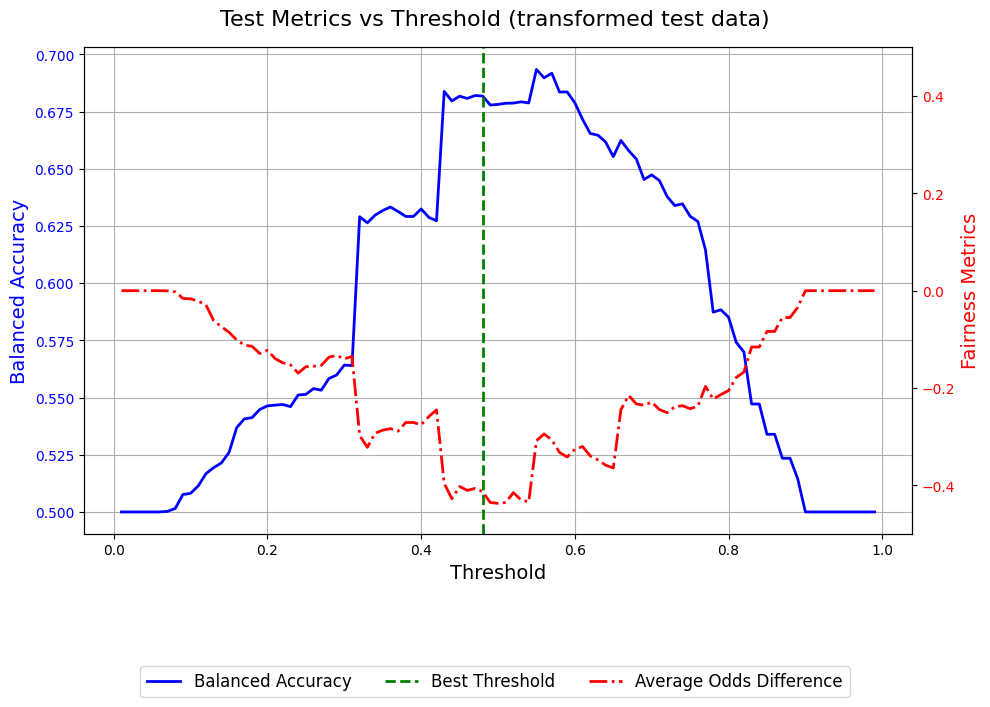

In [8]:
plot_metrics_aod(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)


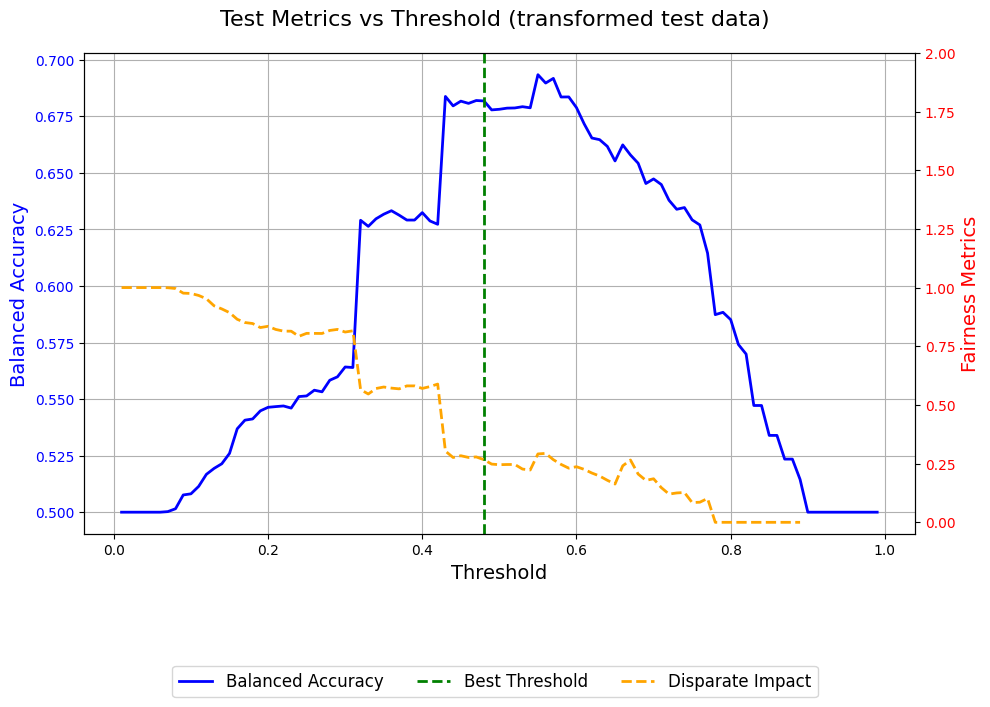

In [9]:
plot_metrics_dir(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)

In [15]:
# Standardize the features (scaling)
train_transf, _ , test_transf = standardize_features(train_transf, val, test_transf)

# Train classifier on transformed data and use the same threshold
classifier_type = 'logistic_regression'  # Change to 'random_forest' or 'xgboost'
test_transf_classifier, test_transf_scores, test_transf_metrics = train_classifier_on_transformed_data(
    train_transf, test_transf, classifier_type, best_threshold, unprivileged_groups, privileged_groups)


Balanced Accuracy (test transformed): 0.6036938660814644
Statistical Parity Difference (test transformed): 0.08185015904056031
Disparate Impact (test transformed): 1.1927076546641764
Average Odds Difference (test transformed): 0.027950504807741278
Equal Opportunity Difference (test transformed): -0.07413695529145448
Theil Index (test transformed): 0.13299597705009497


In [11]:
%matplotlib inline

c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


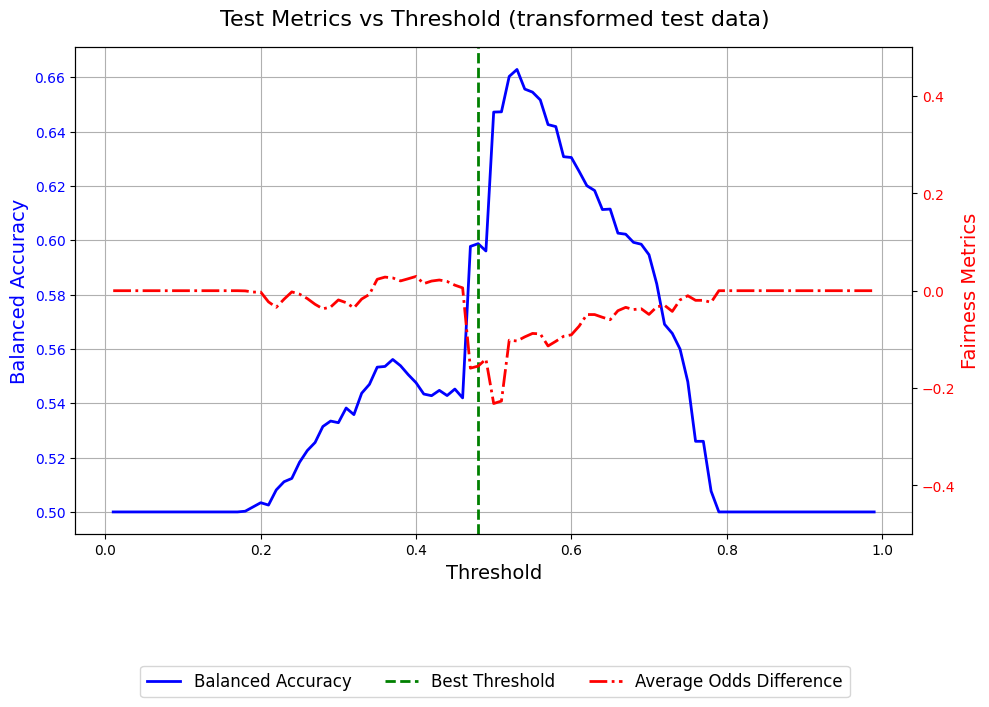

In [12]:
plot_metrics_aod(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

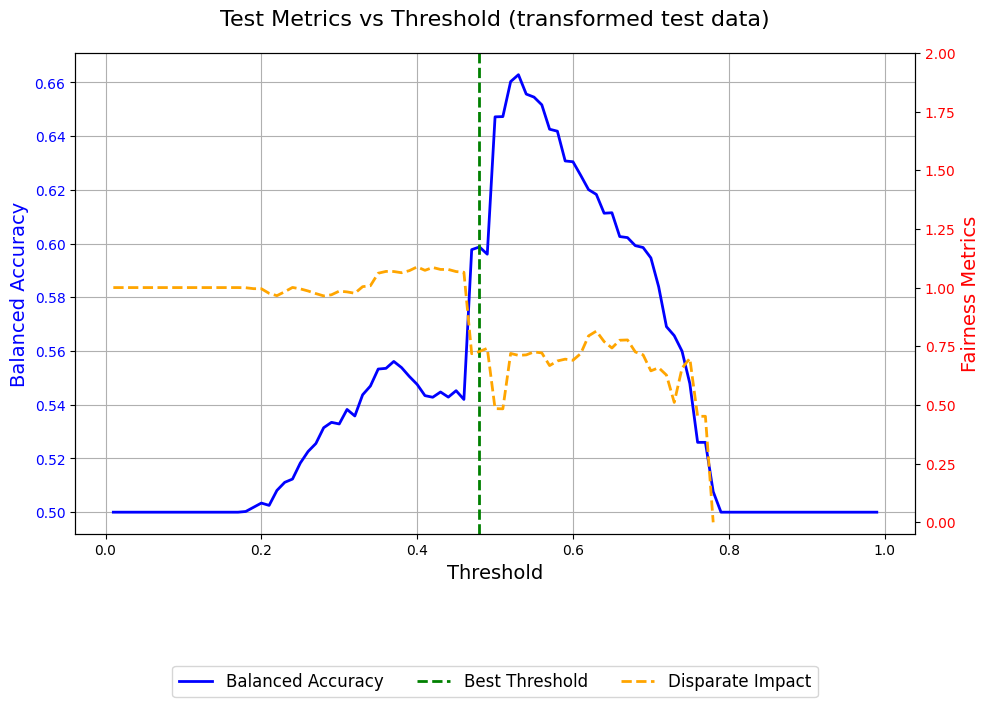

In [13]:
plot_metrics_dir(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

In [14]:
fairness_metrics, validation_metrics, test_metrics = extract_fairness_metrics(
    train_before_stat_parity_diff, train_after_stat_parity_diff,
    test_before_stat_parity_diff, test_after_stat_parity_diff,
    train_before_disp_impact, train_after_disp_impact,
    test_before_disp_impact, test_after_disp_impact,
    best_threshold, best_balanced_acc,
    test_metrics, test_transf_metrics
)

# Displaying the tables
for table in [fairness_metrics, validation_metrics, test_metrics]:
    display(table.name)
    display(table)


'Fairness Metrics Before and After Transformation'

,Dataset,Stage,Metric,Value
0,Train,Before Transformation,Statistical Parity Difference,-0.1264
1,Train,After Transformation,Statistical Parity Difference,-0.0133
2,Test,Before Transformation,Statistical Parity Difference,-0.1491
3,Test,After Transformation,Statistical Parity Difference,-0.0457
4,Train,Before Transformation,Disparate Impact,0.5029
5,Train,After Transformation,Disparate Impact,0.9362
6,Test,Before Transformation,Disparate Impact,0.4347
7,Test,After Transformation,Disparate Impact,0.7951


'Validation Metrics for Threshold Selection'

,Dataset,Stage,Metric,Value
0,Validation,Best Threshold (Validation),Threshold,0.480000
1,Validation,Best Threshold (Validation),Balanced Accuracy,0.690428


'Test Metrics After Applying Threshold On Original and Transformed'

,Dataset,Stage,Metric,Value
0,Test (Original),After Threshold,Balanced Accuracy,0.681804
1,Test (Transformed),After Threshold,Balanced Accuracy,0.598746
2,Test (Original),After Threshold,Statistical Parity Difference,-0.514195
3,Test (Transformed),After Threshold,Statistical Parity Difference,-0.172473
4,Test (Original),After Threshold,Disparate Impact,0.266780
5,Test (Transformed),After Threshold,Disparate Impact,0.727792
6,Test (Original),After Threshold,Average Odds Difference,-0.412799
7,Test (Transformed),After Threshold,Average Odds Difference,-0.155009
8,Test (Original),After Threshold,Equal Opportunity Difference,-0.309735
9,Test (Transformed),After Threshold,Equal Opportunity Difference,-0.139863
